In [3]:
import pandas as pd
import numpy as np
import nba_api.stats.endpoints as nba
import nba_api.stats.static.players as players
import nba_api.stats.static.teams as teams
import networkx as nx

In [4]:
df = pd.read_csv('data/active_player_info_team.csv')
df

,index,id,Full_name,Firstname,Surname,Active,team_name,team_id
0,0,1630173,Precious Achiuwa,Precious,Achiuwa,True,Knicks,1610612752
1,1,203500,Steven Adams,Steven,Adams,True,Rockets,1610612745
2,2,1628389,Bam Adebayo,Bam,Adebayo,True,Heat,1610612748
3,3,1630534,Ochai Agbaji,Ochai,Agbaji,True,Raptors,1610612761
4,4,1631231,James Akinjo,James,Akinjo,True,NaN,0
...,...,...,...,...,...,...,...,...
610,610,203469,Cody Zeller,Cody,Zeller,True,Hawks,1610612737
611,611,1627826,Ivica Zubac,Ivica,Zubac,True,Clippers,1610612746
612,612,1641783,Tristan da Silva,Tristan,da Silva,True,Magic,1610612753
613,613,1628427,Vlatko Čančar,Vlatko,Čančar,True,Nuggets,1610612743


In [5]:
players_without_team = df[df['team_id'] == 0]
players_without_team.shape

(47, 8)

In [6]:
team_ids = df['team_id'].unique()
team_network = pd.DataFrame()
for team_id in team_ids:
    players_on_team = df[df['team_id'] == team_id]['id']
    for player_id in players_on_team:
        player_network = pd.DataFrame(columns=['passer_id', 'receiver_id', 'freq', 'team_id'])
        passes_made = nba.playerdashptpass.PlayerDashPtPass(team_id=team_id, player_id=player_id).get_data_frames()[0]
        player_network['receiver_id'] = passes_made['PASS_TEAMMATE_PLAYER_ID']
        player_network['freq'] = passes_made['FREQUENCY']
        player_network['passer_id'] = player_id
        player_network['team_id'] = team_id
        team_network = pd.concat([team_network, player_network], ignore_index=True)
    break


C:\Users\Mario\AppData\Local\Temp\ipykernel_12616\3479522273.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team_network = pd.concat([team_network, player_network], ignore_index=True)
C:\Users\Mario\AppData\Local\Temp\ipykernel_12616\3479522273.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team_network = pd.concat([team_network, player_network], ignore_index=True)
C:\Users\Mario\AppData\Local\Temp\ipykernel_12616\3479522273.py:12: FutureWarning: The behavior of DataFrame concatenati

KeyboardInterrupt: 

In [5]:
team_network

,passer_id,receiver_id,freq,team_id
0,1628384,1642278,0.008,1610612752
1,1628384,1630579,0.032,1610612752
2,1628384,1630574,0.005,1610612752
3,1628384,1630540,0.072,1610612752
4,1628384,1630346,0.003,1610612752
...,...,...,...,...
118,1626157,1628973,0.384,1610612752
119,1626157,1628969,0.114,1610612752
120,1626157,1628404,0.199,1610612752
121,1626157,1628384,0.105,1610612752


In [6]:
nba.playerdashptpass.PlayerDashPtPass(team_id=team_id, player_id=player_id).get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_TO,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Dadiet, Pacôme",1642359,0.004,...,0,0,1,0.000,0,1,0.000,0,0,0.000
1,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Kolek, Tyler",1642278,0.007,...,0,0,0,0.000,0,0,0.000,0,0,0.000
2,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"McBride, Miles",1630540,0.100,...,1,3,11,0.273,2,4,0.500,1,7,0.143
3,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Ryan, Matt",1630346,0.004,...,0,0,1,0.000,0,1,0.000,0,0,0.000
4,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Brunson, Jalen",1628973,0.384,...,8,14,35,0.400,13,29,0.448,1,6,0.167
5,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Bridges, Mikal",1628969,0.114,...,10,11,16,0.688,6,7,0.857,5,9,0.556
6,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Hart, Josh",1628404,0.199,...,3,4,14,0.286,3,9,0.333,1,5,0.200
7,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Anunoby, OG",1628384,0.105,...,12,15,28,0.536,14,21,0.667,1,7,0.143
8,1626157,"Towns, Karl-Anthony",New York Knicks,1610612752,NYK,made,12,"Payne, Cameron",1626166,0.083,...,2,2,8,0.250,0,3,0.000,2,5,0.400


In [7]:
# Show 10 digits of the id

print(ids_teams.where(teams_df['nickname'] == 'Lakers').dropna())

NameError: name 'ids_teams' is not defined

In [ ]:
lastNGames = 10
LeagueID = '00'
Month = 1
OpponentTeamID = 0
PerMode = 'Totals'
PlayerID = '2544' #LeBron James
Season = '2019-20'
SeasonType = 'Regular Season'
TeamID = '1610612747'


lebron_made = nba.playerdashptpass.PlayerDashPtPass(team_id=TeamID, player_id=PlayerID).get_data_frames()[0]
lebron_received = nba.playerdashptpass.PlayerDashPtPass(team_id=TeamID, player_id=PlayerID).get_data_frames()[1]

In [ ]:
lebron_made

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_TO,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"James, Bronny",1642355,0.003,...,0,0,1,0.000,0,0,0.000,0,1,0.000
1,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Knecht, Dalton",1642261,0.066,...,4,4,14,0.286,2,5,0.400,2,9,0.222
2,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Koloko, Christian",1631132,0.002,...,0,0,0,0.000,0,0,0.000,0,0,0.000
3,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Christie, Max",1631108,0.028,...,1,1,8,0.125,0,3,0.000,1,5,0.200
4,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Reaves, Austin",1630559,0.260,...,19,22,46,0.478,13,19,0.684,9,27,0.333
5,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Hayes, Jaxson",1629637,0.068,...,10,11,19,0.579,11,19,0.579,0,0,0.000
6,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Reddish, Cam",1629629,0.024,...,4,4,5,0.800,3,4,0.750,1,1,1.000
7,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Vincent, Gabe",1629216,0.061,...,3,4,15,0.267,2,6,0.333,2,9,0.222
8,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Hachimura, Rui",1629060,0.087,...,9,10,27,0.370,5,16,0.313,5,11,0.455
9,2544,"James, LeBron",Los Angeles Lakers,1610612747,LAL,made,10,"Russell, D'Angelo",1626156,0.183,...,6,9,31,0.290,5,15,0.333,4,16,0.250


In [7]:
passing_stats_df = pd.read_csv('data/NBA_pass_data_2324_totals_regularseason.csv')
passing_stats_df

,Unnamed: 0,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_TO,PASS_TEAMMATE_PLAYER_ID,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,0,1628369,"Tatum, Jayson",Boston Celtics,1610612738,BOS,made,73,"Banton, Dalano",1630625,...,2,2,4,0.500,1,2,0.5,1,2,0.500
1,1,1628369,"Tatum, Jayson",Boston Celtics,1610612738,BOS,made,73,"Hauser, Sam",1630573,...,39,40,82,0.488,6,12,0.5,34,70,0.486
2,2,1628369,"Tatum, Jayson",Boston Celtics,1610612738,BOS,made,73,"Springer, Jaden",1630531,...,0,0,1,0.000,0,0,0.0,0,1,0.000
3,3,1628369,"Tatum, Jayson",Boston Celtics,1610612738,BOS,made,73,"Tillman, Xavier",1630214,...,2,2,7,0.286,0,2,0.0,2,5,0.400
4,4,1628369,"Tatum, Jayson",Boston Celtics,1610612738,BOS,made,73,"Stevens, Lamar",1630205,...,1,1,3,0.333,0,0,0.0,1,3,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,3,201959,"Gibson, Taj",Detroit Pistons,1610612765,DET,made,4,"Flynn, Malachi",1630201,...,0,0,4,0.000,0,2,0.0,0,2,0.000
8181,4,201959,"Gibson, Taj",Detroit Pistons,1610612765,DET,made,4,"Wiseman, James",1630164,...,0,0,0,0.000,0,0,0.0,0,0,0.000
8182,5,201959,"Gibson, Taj",Detroit Pistons,1610612765,DET,made,4,"Nowell, Jaylen",1629669,...,0,0,1,0.000,0,0,0.0,0,1,0.000
8183,6,201959,"Gibson, Taj",Detroit Pistons,1610612765,DET,made,4,"Brown Jr., Troy",1628972,...,1,1,2,0.500,1,2,0.5,0,0,0.000


In [8]:
passing_stats_df = passing_stats_df[['PLAYER_ID', 'PLAYER_NAME_LAST_FIRST', 'TEAM_ID', 'TEAM_NAME', 'PASS_TO', 'PASS_TEAMMATE_PLAYER_ID', 'FREQUENCY', 'PASS', 'AST']]

# Frequency Network

In [59]:
# Create a directed graph
def create_directed_graph(df, filename, weight_label = 'PASS'):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        G.add_node(row['PLAYER_ID'], team_id=row['TEAM_ID'])
        G.add_node(row['PASS_TEAMMATE_PLAYER_ID'], team_id=row['TEAM_ID'])
        G.add_edge(row['PLAYER_ID'], row['PASS_TEAMMATE_PLAYER_ID'], weight=row[weight_label])
    nx.write_gexf(G, 'networks/' + filename + '.gexf')

In [ ]:
df_frequency = passing_stats_df[['PLAYER_ID', 'PASS_TEAMMATE_PLAYER_ID', 'FREQUENCY', 'TEAM_ID']]
create_directed_graph(df_frequency, 'passing_frequency')

# Flow Network

In [ ]:
df_flow = passing_stats_df[['PLAYER_ID', 'PASS_TEAMMATE_PLAYER_ID', 'PASS', 'TEAM_ID']]
team_ids = df_flow['TEAM_ID'].unique()
team_id = team_ids[0]
df_flow = df_flow[df_flow['TEAM_ID'] == team_id]

[1610612738]


In [ ]:
df_flow_inverse = df_flow.copy()
df_flow_inverse.rename(columns={'PLAYER_ID': 'PASS_TEAMMATE_PLAYER_ID', 'PASS_TEAMMATE_PLAYER_ID': 'PLAYER_ID'}, inplace=True)
df_flow_inverse['PASS'] = -df_flow_inverse['PASS']
df_flow_total = pd.concat([df_flow, df_flow_inverse], ignore_index=True)
df_flow_total = df_flow_total.groupby(['PLAYER_ID', 'PASS_TEAMMATE_PLAYER_ID', 'TEAM_ID']).sum().reset_index()
# Make all the values positive
for index, row in df_flow_total.iterrows():
    if row['PASS'] < 0:
        df_flow_total.at[index, 'PASS'], df_flow_total.at[index, 'PLAYER_ID'], df_flow_total.at[index, 'PASS_TEAMMATE_PLAYER_ID'] = -row['PASS'], row['PASS_TEAMMATE_PLAYER_ID'], row['PLAYER_ID']

df_flow_total = df_flow_total.groupby(['PLAYER_ID', 'PASS_TEAMMATE_PLAYER_ID', 'TEAM_ID']).first().reset_index() # Remove duplicates
create_directed_graph(df_flow_total, 'flow_network')

,PLAYER_ID,PASS_TEAMMATE_PLAYER_ID,TEAM_ID,PASS
0,201143,201950,1610612738,73
1,201143,1627759,1610612738,49
2,201143,1628369,1610612738,36
3,201143,1628401,1610612738,120
4,201143,1628436,1610612738,5
...,...,...,...,...
147,1641809,1630205,1610612738,1
148,1641809,1630531,1610612738,0
149,1641809,1630573,1610612738,0
150,1641809,1630625,1610612738,1


In [58]:
# Normalize the weights for each node
df_flow_normalized = df_flow_total.copy()
player_ids = df_flow_normalized['PLAYER_ID'].unique()
for player_id in player_ids:
    player_passes = df_flow_normalized[df_flow_total['PLAYER_ID'] == player_id]
    total_passes = player_passes['PASS'].sum()
    for index, row in player_passes.iterrows():
        df_flow_normalized.at[index, 'PASS'] = row['PASS'] / total_passes

df_flow_normalized[df_flow_normalized['PLAYER_ID'] == player_ids[0]].groupby(['PLAYER_ID', 'PASS_TEAMMATE_PLAYER_ID', 'TEAM_ID']).sum().shape
# Delete the rows with 0 weight
df_flow_normalized = df_flow_normalized[df_flow_normalized['PASS'] != 0]

create_directed_graph(df_flow_normalized, 'flow_normalized')

C:\Users\Mario\AppData\Local\Temp\ipykernel_12616\1267745351.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.18911917098445596' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_flow_normalized.at[index, 'PASS'] = row['PASS'] / total_passes


In [56]:
df_flow_normalized[df_flow_normalized['PLAYER_ID'] == player_ids[0]]

,PLAYER_ID,PASS_TEAMMATE_PLAYER_ID,TEAM_ID,PASS
0,201143,201950,1610612738,0.189119
1,201143,1627759,1610612738,0.126943
2,201143,1628369,1610612738,0.093264
3,201143,1628401,1610612738,0.310881
4,201143,1628436,1610612738,0.012953
5,201143,1629004,1610612738,0.005181
6,201143,1629674,1610612738,0.000000
7,201143,1630202,1610612738,0.160622
8,201143,1630205,1610612738,0.002591
9,201143,1630214,1610612738,0.010363


In [56]:
# Print team
team_id = team_ids[0]
print(teams.find_team_name_by_id(team_id))

{'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}


In [36]:
make = df_flow['PLAYER_ID'].unique()
receive = df_flow['PASS_TEAMMATE_PLAYER_ID'].unique()
# Display the players that dont make a pass but receive a pass
players_without_make = np.setdiff1d(receive, make)
for player in players_without_make:
    print(players.find_player_by_id(player))

{'id': 1630205, 'full_name': 'Lamar Stevens', 'first_name': 'Lamar', 'last_name': 'Stevens', 'is_active': True}
{'id': 1630625, 'full_name': 'Dalano Banton', 'first_name': 'Dalano', 'last_name': 'Banton', 'is_active': True}


In [13]:
G = nx.Graph()
G.add_node('GOAL', attr='Goal')

In [14]:
for index, row in passing_stats_df.iterrows():
    player = row['PLAYER_NAME_LAST_FIRST']
    team = row['TEAM_NAME']
    if not G.has_node(player):
        G.add_node(player, attr=team)

In [15]:
for index, row in passing_stats_df.iterrows():
    edge = (row['PLAYER_NAME_LAST_FIRST'], row['PASS_TO'])
    weight = row['PASS']
    if G.has_edge(*edge):
        # If the edge exists, add to the current weight
        G[edge[0]][edge[1]]['weight'] += weight    
    else:
        G.add_edge(edge[0], edge[1], weight=weight)

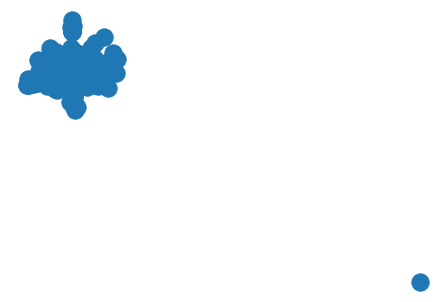

In [16]:
nx.draw(G)